In [51]:
# getPropositions() below returns an ObjectArrayList. Its elements can be accessed
# as a python list by the .elements() method
# for ap in minie.getPropositions().elements():
    
#     # Some elements might by null so we don't process them.
#     if ap is not None: 
#         print("\tTriple:", ap.getTripleAsString())
#         print("\tFactuality:", ap.getFactualityAsString())
#         if ap.getAttribution().getAttributionPhrase() is not None:
#             print("\tAttribution:", ap.getAttribution().toStringCompact());
#         else:
#             print("\tAttribution: NONE")
#         print("\t----------");
        
# print("DONE!")

In [46]:
#!pip2 install networkx, matplotlib, flair

import os
os.environ['CLASSPATH'] = "/target/minie-0.0.1-SNAPSHOT.jar"

from jnius import autoclass

CoreNLPUtils = autoclass('de.uni_mannheim.utils.coreNLP.CoreNLPUtils')
AnnotatedProposition = autoclass('de.uni_mannheim.minie.annotation.AnnotatedProposition')
MinIE = autoclass('de.uni_mannheim.minie.MinIE')
StanfordCoreNLP = autoclass('edu.stanford.nlp.pipeline.StanfordCoreNLP')
String = autoclass('java.lang.String')

parser = CoreNLPUtils.StanfordDepNNParser()

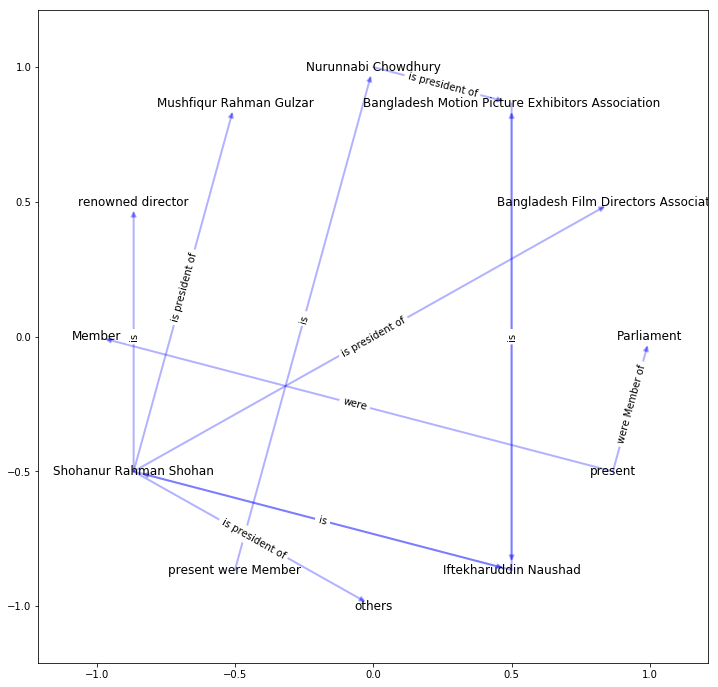

In [56]:
sentence = "State Minister for Ministry of Information, Dr Md Murad Hasan graced the event as the chief guest. \
Also present were Member of Parliament, Nurunnabi Chowdhury, president of Bangladesh Motion Picture Exhibitors Association,\
Iftekharuddin Naushad, renowned director Shohanur Rahman Shohan, president of Bangladesh Film Directors Association, Mushfiqur\
Rahman Gulzar and many others."

minie = MinIE(String(sentence), parser, 0)

graph = []
labels = []
for ap in minie.getPropositions().elements():
    if ap is not None:
        triple = ap.getTripleAsString().replace("\"", "").strip().split("\t")
        if len(triple)==3:
            graph += [(triple[0], triple[2])]
            labels += [triple[1]]

import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

G.add_edges_from(graph)

graph_pos = nx.shell_layout(G)
plt.figure(1,figsize=(12,12)) 

nx.draw_networkx_edges(G, graph_pos, width=2, alpha=0.3, edge_color='blue')
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

edge_labels = dict(zip(graph, labels))
nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels)

plt.show()

In [66]:
!pip2 install flair

  Using cached https://files.pythonhosted.org/packages/44/54/76374f9a448ca765446502e7f2bb53c976e9c055102290fe6f8b0b038b37/flair-0.4.1.tar.gz


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "c:\users\hp\appdata\local\temp\pip-install-mraenw\flair\setup.py", line 7, in <module>
        long_description=open("README.md", encoding='utf-8').read(),
    TypeError: 'encoding' is an invalid keyword argument for this function
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in c:\users\hp\appdata\local\temp\pip-install-mraenw\flair\


In [63]:
!pip2 install --upgrade setuptools

  Using cached https://files.pythonhosted.org/packages/ec/51/f45cea425fd5cb0b0380f5b0f048ebc1da5b417e48d304838c02d6288a1e/setuptools-41.0.1-py2.py3-none-any.whl
  Found existing installation: setuptools 40.6.2
    Uninstalling setuptools-40.6.2:
      Successfully uninstalled setuptools-40.6.2


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [61]:
!python2 -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/5c/e0/be401c003291b56efc55aeba6a80ab790d3d4cece2778288d65323009420/pip-19.1.1-py2.py3-none-any.whl
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [65]:
!pip2 install ez_setup

  Running setup.py install for ez-setup: started
    Running setup.py install for ez-setup: finished with status 'done'


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [60]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence('I love Berlin .')

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

ImportError: No module named flair.data

In [ ]:
print(sentence)
print('The following NER tags are found:')

# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)